In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import os, glob
from sklearn.metrics import confusion_matrix


from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE


from imblearn.pipeline import Pipeline



In [3]:
df = pd.read_csv('stroke_1.csv')

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.loc[:,'bmi'].fillna(df.loc[:,'bmi'].mean(),inplace=True)

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df.drop('id',inplace=True,axis=1)


In [11]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# **GENDER COLUMN ANALYSIS**

In [12]:
print('Unique values\n',df['gender'].unique())

Unique values
 ['Male' 'Female' 'Other']


In [13]:
df['gender'].isna().sum()

0

In [14]:
print('Value Counts\n',df['gender'].value_counts())

Value Counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [15]:
print('Male and stroke ',len(df[(df['gender']=='Male') & (df['stroke']==1)]))
print('Male and without stroke ',len(df[(df['gender']=='Male') & (df['stroke']==0)]))
print('Female and stroke ',len(df[(df['gender']=='Female') & (df['stroke']==1)]))
print('Female and without stroke ',len(df[(df['gender']=='Female') & (df['stroke']==0)]))
print('Other and stroke ',len(df[(df['gender']=='Other') & (df['stroke']==1)]))
print('Other and without stroke ',len(df[(df['gender']=='Other') & (df['stroke']==0)]))

Male and stroke  108
Male and without stroke  2007
Female and stroke  141
Female and without stroke  2853
Other and stroke  0
Other and without stroke  1


<AxesSubplot:xlabel='gender', ylabel='count'>

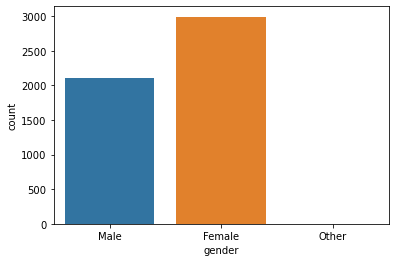

In [16]:
sns.countplot(data=df,x='gender')


<AxesSubplot:xlabel='gender', ylabel='count'>

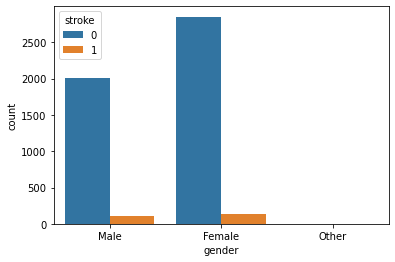

In [17]:
sns.countplot(data=df,x='gender',hue='stroke')

# **AGE COLUMN ANALYSIS**

In [18]:
df['age'].nunique()

104

In [19]:
df['age'].isna().sum()

0

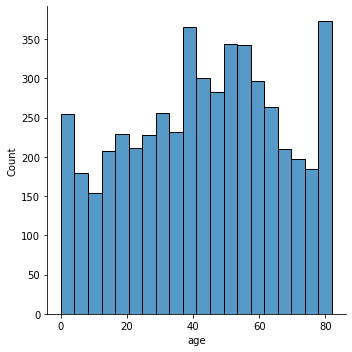

In [20]:
sns.displot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

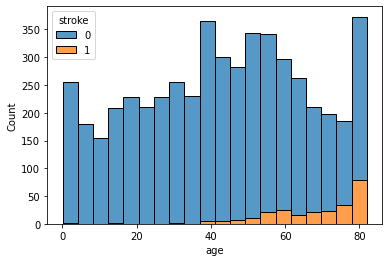

In [21]:
sns.histplot(data=df, x="age", hue="stroke", multiple="stack")

# **Hypertention column Analysis**

In [22]:
df['hypertension'].unique()

array([0, 1], dtype=int64)

In [23]:
df['hypertension'].isna().sum()

0

In [24]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [25]:
print('hypertension and stroke ',len(df[(df['hypertension']==1) & (df['stroke']==1)]))
print('hypertension and without stroke ',len(df[(df['hypertension']==1) & (df['stroke']==0)]))
print('without hypertension and stroke ',len(df[(df['hypertension']==0) & (df['stroke']==1)]))
print('without hypertension and without stroke ',len(df[(df['hypertension']==0) & (df['stroke']==0)]))

hypertension and stroke  66
hypertension and without stroke  432
without hypertension and stroke  183
without hypertension and without stroke  4429


<AxesSubplot:xlabel='hypertension', ylabel='count'>

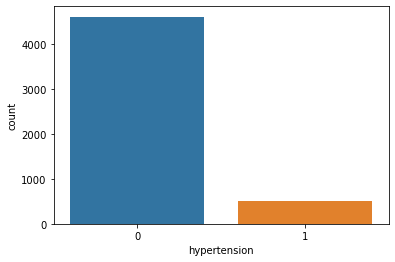

In [26]:
sns.countplot(data=df,x='hypertension')

<AxesSubplot:xlabel='hypertension', ylabel='count'>

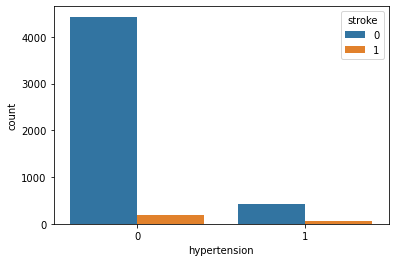

In [27]:
sns.countplot(data=df,x='hypertension',hue='stroke')

# **Heart Disease Column Analysis**

In [28]:
print(df['heart_disease'].unique())

[1 0]


In [29]:
df['heart_disease'].isna().sum()

0

In [30]:
print(df['heart_disease'].value_counts())

0    4834
1     276
Name: heart_disease, dtype: int64


In [31]:
print('Heart disease and stroke ',len(df[(df['heart_disease']==1) & (df['stroke']==1)]))
print('Heart disease and without stroke ',len(df[(df['heart_disease']==1) & (df['stroke']==0)]))
print('without Heart disease and stroke ',len(df[(df['heart_disease']==0) & (df['stroke']==1)]))
print('without Heart disease and without stroke ',len(df[(df['heart_disease']==0) & (df['stroke']==0)]))

Heart disease and stroke  47
Heart disease and without stroke  229
without Heart disease and stroke  202
without Heart disease and without stroke  4632


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

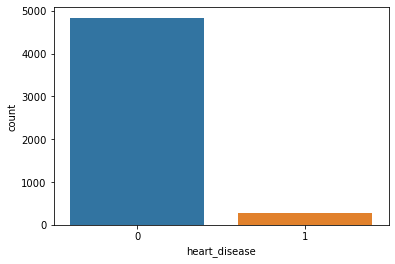

In [32]:
sns.countplot(data=df,x='heart_disease')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

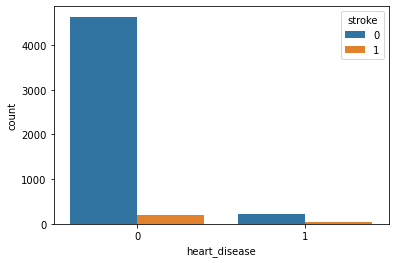

In [33]:
sns.countplot(data=df,x='heart_disease',hue='stroke')

# **EVER MARRIED COLUMN ANALYSIS**

In [34]:
print(df['ever_married'].unique())
print(df['ever_married'].value_counts())

['Yes' 'No']
Yes    3353
No     1757
Name: ever_married, dtype: int64


In [35]:
df['ever_married'].isna().sum()

0

In [36]:
print('Married and stroke ',len(df[(df['ever_married']=='Yes') & (df['stroke']==1)]))
print('Married and without stroke ',len(df[(df['ever_married']=='Yes') & (df['stroke']==0)]))
print('without Married and stroke ',len(df[(df['ever_married']=='No') & (df['stroke']==1)]))
print('without Married and without stroke ',len(df[(df['ever_married']=='No') & (df['stroke']==0)]))

Married and stroke  220
Married and without stroke  3133
without Married and stroke  29
without Married and without stroke  1728


<AxesSubplot:xlabel='ever_married', ylabel='count'>

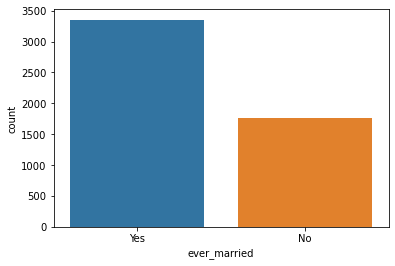

In [37]:
sns.countplot(data=df,x='ever_married')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

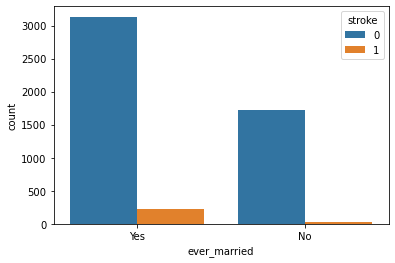

In [38]:
sns.countplot(data=df,x='ever_married',hue='stroke')

# **WORK TYPE COLUMN ANALYSIS**

In [39]:
print(df['work_type'].unique())
print(df['work_type'].value_counts())

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


In [40]:
df['work_type'].isna().sum()

0

In [41]:
print('Private and stroke ',len(df[(df['work_type']=='Private') & (df['stroke']==1)]))
print('Private and without stroke ',len(df[(df['work_type']=='Private') & (df['stroke']==0)]))

print('Self-employed and stroke ',len(df[(df['work_type']=='Self-employed') & (df['stroke']==1)]))
print('Self-employed and without stroke ',len(df[(df['work_type']=='Self-employed') & (df['stroke']==0)]))

print('children and stroke ',len(df[(df['work_type']=='children') & (df['stroke']==1)]))
print('children and without stroke ',len(df[(df['work_type']=='children') & (df['stroke']==0)]))

print('Govt_job and stroke ',len(df[(df['work_type']=='Govt_job') & (df['stroke']==1)]))
print('Govt_job and without stroke ',len(df[(df['work_type']=='Govt_job ') & (df['stroke']==0)]))

print('Never_worked and stroke ',len(df[(df['work_type']=='Never_worked') & (df['stroke']==1)]))
print('Never_worked and without stroke ',len(df[(df['work_type']=='Never_worked') & (df['stroke']==0)]))

Private and stroke  149
Private and without stroke  2776
Self-employed and stroke  65
Self-employed and without stroke  754
children and stroke  2
children and without stroke  685
Govt_job and stroke  33
Govt_job and without stroke  0
Never_worked and stroke  0
Never_worked and without stroke  22


<AxesSubplot:xlabel='work_type', ylabel='count'>

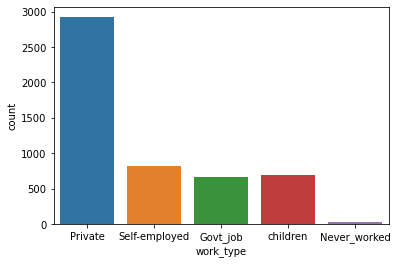

In [42]:
sns.countplot(data=df,x='work_type')

<AxesSubplot:xlabel='work_type', ylabel='count'>

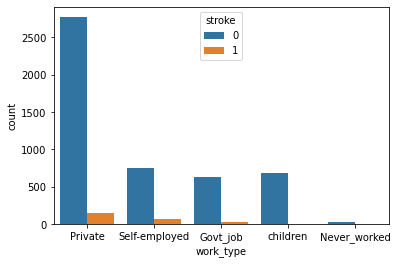

In [43]:
sns.countplot(data=df,x='work_type',hue='stroke')

# **RESIDENCE TYPE COLUMN ANALYSIS**

In [44]:
print(df['Residence_type'].unique())
print(df['Residence_type'].value_counts())

['Urban' 'Rural']
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


In [45]:
df['Residence_type'].isna().sum()

0

In [46]:
print('Urban and stroke ',len(df[(df['Residence_type']=='Urban') & (df['stroke']==1)]))
print('Urban and without stroke ',len(df[(df['Residence_type']=='Urban') & (df['stroke']==0)]))
print('Rural and stroke ',len(df[(df['Residence_type']=='Rural') & (df['stroke']==1)]))
print('Rural and without stroke ',len(df[(df['Residence_type']=='Rural') & (df['stroke']==0)]))

Urban and stroke  135
Urban and without stroke  2461
Rural and stroke  114
Rural and without stroke  2400


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

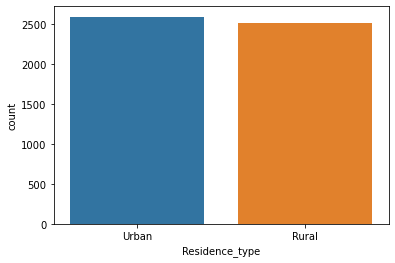

In [47]:
sns.countplot(data=df,x='Residence_type')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

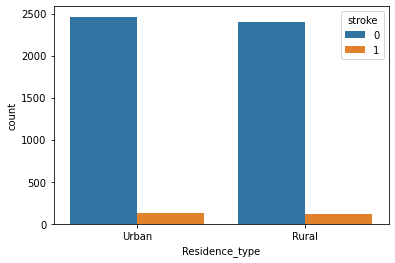

In [48]:
sns.countplot(data=df,x='Residence_type',hue='stroke')

# **AVERAGE GLUCOSE LEVEL ANALYSIS**

In [49]:
df['avg_glucose_level'].nunique()

3979

In [50]:
df['avg_glucose_level'].isna().sum()

0

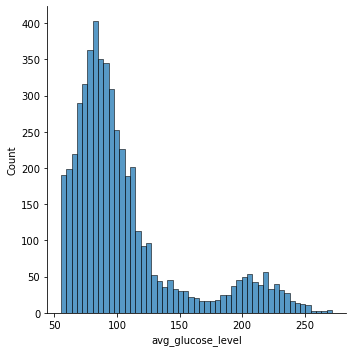

In [51]:
sns.displot(df['avg_glucose_level'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

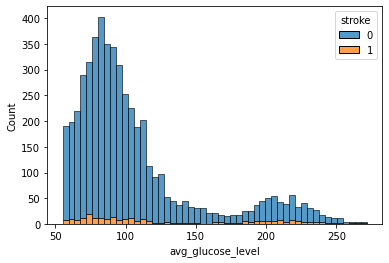

In [52]:
sns.histplot(data=df, x="avg_glucose_level", hue="stroke", multiple="stack")

# **BMI COLUMN ANALYSIS**

In [53]:
df['bmi'].isna().sum()
df['bmi'].nunique()

419

In [54]:
df['bmi'].isna().sum()

0

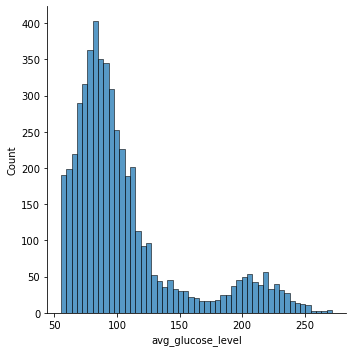

In [55]:
sns.displot(df['avg_glucose_level'])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

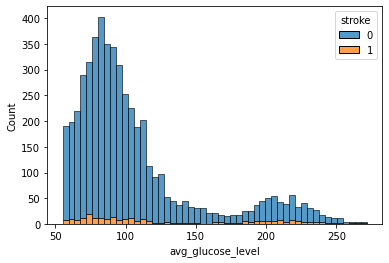

In [56]:
sns.histplot(data=df, x="avg_glucose_level", hue="stroke", multiple="stack")

# **SMOKING STATUS COLUMN ANALYSIS**

In [57]:
print(df['smoking_status'].unique())
print(df['smoking_status'].value_counts())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [58]:
df['smoking_status'].isnull().sum()

0

In [59]:
print('formerly smoked and stroke ',len(df[(df['smoking_status']=='formerly smoked') & (df['stroke']==1)]))
print('formerly smoked and without stroke ',len(df[(df['smoking_status']=='formerly smoked') & (df['stroke']==0)]))

print('never smoked and stroke ',len(df[(df['smoking_status']=='never smoked') & (df['stroke']==1)]))
print('never smoked and without stroke ',len(df[(df['smoking_status']=='never smoked') & (df['stroke']==0)]))

print('smokes and stroke ',len(df[(df['smoking_status']=='smokes') & (df['stroke']==1)]))
print('smokes smoked and without stroke ',len(df[(df['smoking_status']=='smokes') & (df['stroke']==0)]))

print('Unknown and stroke ',len(df[(df['smoking_status']=='Unknown') & (df['stroke']==1)]))
print('Unknown and without stroke ',len(df[(df['smoking_status']=='Unknown') & (df['stroke']==0)]))

formerly smoked and stroke  70
formerly smoked and without stroke  815
never smoked and stroke  90
never smoked and without stroke  1802
smokes and stroke  42
smokes smoked and without stroke  747
Unknown and stroke  47
Unknown and without stroke  1497


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

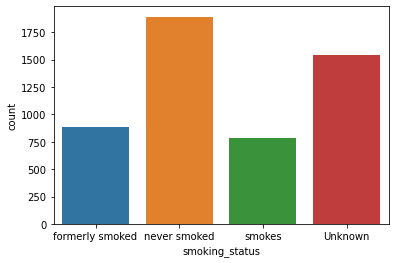

In [60]:
sns.countplot(data=df,x='smoking_status')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

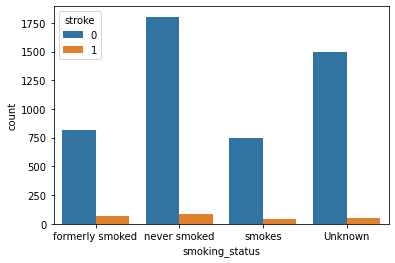

In [61]:
sns.countplot(data=df,x='smoking_status',hue='stroke')

# **STOKE TARGET CLASS**

In [62]:
print(df['stroke'].unique())
print(df['stroke'].value_counts())

[1 0]
0    4861
1     249
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

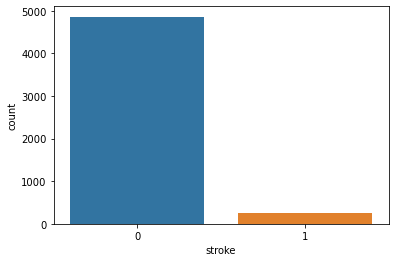

In [63]:
sns.countplot(data=df,x='stroke')

In [64]:
df.shape

(5110, 11)

# **LABEL ENCODING**

In [65]:
df['gender']=df['gender'].apply(lambda x :1 if x=='Male' else (2 if x == 'Female' else 3 ))

In [66]:
df['ever_married']=df['ever_married'].apply(lambda x :1 if x=='Yes' else 2)

In [67]:
df['work_type']=df['work_type'].apply(lambda x :1 if x=='Govt_job' else (2 if x == 'Never_worked' else 3 if x=='Private' else 4 if x=='Self-employed'
                                                                  else 5))

In [68]:
df['Residence_type']=df['Residence_type'].apply(lambda x :1 if x=='Rural' else 2)

In [69]:
df['smoking_status']=df['smoking_status'].apply(lambda x :1 if x=='Unknown' else (2 if x == 'formerly smoked' else 3 if x=='never smoked' else 4))

In [70]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,2,228.69,36.600000,2,1
1,2,61.0,0,0,1,4,1,202.21,28.893237,3,1
2,1,80.0,0,1,1,3,1,105.92,32.500000,3,1
3,2,49.0,0,0,1,3,2,171.23,34.400000,4,1
4,2,79.0,1,0,1,4,1,174.12,24.000000,3,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,2,80.0,1,0,1,3,2,83.75,28.893237,3,0
5106,2,81.0,0,0,1,4,2,125.20,40.000000,3,0
5107,2,35.0,0,0,1,4,1,82.99,30.600000,3,0
5108,1,51.0,0,0,1,3,1,166.29,25.600000,2,0


# **NORMALIZING DATASET**

In [71]:
from sklearn import preprocessing
x_avg_glucose_level1 = np.array(df['avg_glucose_level'])
x_bmi1 = np.array(df['bmi'])
normalized_arr_glucose1 = preprocessing.normalize([x_avg_glucose_level1])
normalized_arr_bmi1 = preprocessing.normalize([x_bmi1])
print(normalized_arr_glucose1.shape)
print(normalized_arr_bmi1.shape)

(1, 5110)
(1, 5110)


In [72]:
df['avg_glucose_level'] = normalized_arr_glucose1[0].tolist()
df['bmi'] = normalized_arr_bmi1[0].tolist()

In [73]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,2,0.027722,0.017123,2,1
1,2,61.0,0,0,1,4,1,0.024512,0.013518,3,1
2,1,80.0,0,1,1,3,1,0.012840,0.015205,3,1
3,2,49.0,0,0,1,3,2,0.020757,0.016094,4,1
4,2,79.0,1,0,1,4,1,0.021107,0.011228,3,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,2,80.0,1,0,1,3,2,0.010152,0.013518,3,0
5106,2,81.0,0,0,1,4,2,0.015177,0.018714,3,0
5107,2,35.0,0,0,1,4,1,0.010060,0.014316,3,0
5108,1,51.0,0,0,1,3,1,0.020158,0.011977,2,0


In [74]:
target_class = df.stroke
input_column = df.drop(['stroke'],axis=1)
train_x,test_x,train_y,test_y=train_test_split(input_column,target_class,random_state=5,test_size=0.20)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((4088, 10), (1022, 10), (4088,), (1022,))

In [75]:
train_y.value_counts(),test_y.value_counts()

(0    3891
 1     197
 Name: stroke, dtype: int64,
 0    970
 1     52
 Name: stroke, dtype: int64)

In [76]:
train_x.shape,train_y.shape

((4088, 10), (4088,))

# **Feature Selection**

# Pearson Correalation

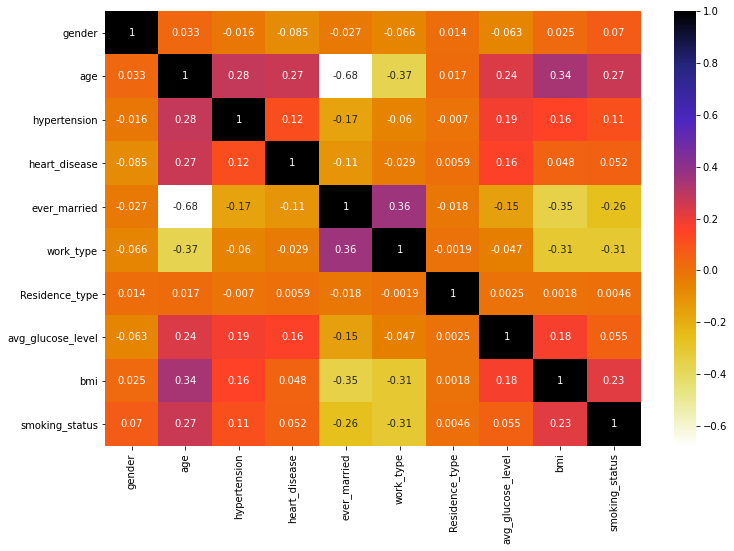

In [77]:
plt.figure(figsize=(12,8))
cor = train_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [78]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [79]:
corr_features = correlation(train_x, 0.7)

In [80]:
corr_features

set()

# Finding most Useful Features(Univariate Process)

In [81]:
bestfeatures = SelectKBest(score_func=chi2,k='all')
fit = bestfeatures.fit(input_column,target_class)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(input_column.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 

In [82]:
featureScores

,Feature,Score
0,gender,0.066244
1,age,3635.226911
2,hypertension,75.449498
3,heart_disease,87.987436
4,ever_married,10.069638
5,work_type,2.002236
6,Residence_type,0.202370
7,avg_glucose_level,0.208292
8,bmi,0.007436
9,smoking_status,1.951857


In [83]:
print(featureScores.nlargest(5,'Score'))

         Feature        Score
1            age  3635.226911
3  heart_disease    87.987436
2   hypertension    75.449498
4   ever_married    10.069638
5      work_type     2.002236


# Finding most Useful Features(using ExtraTreesClassifier)

In [84]:
model = ExtraTreesClassifier()
model.fit(input_column,target_class)

ExtraTreesClassifier()

In [85]:
print(model.feature_importances_)

[0.033521   0.25413605 0.02219289 0.02072874 0.01777447 0.05961331
 0.03473837 0.24983292 0.21836569 0.08909654]


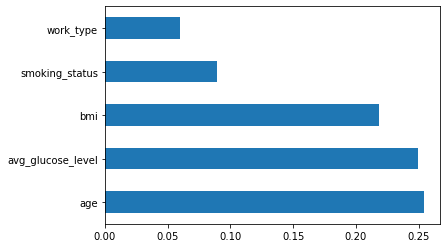

In [86]:
feat_importances = pd.Series(model.feature_importances_, index=input_column.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# **Removing not very important features**

In [87]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,2,0.027722,0.017123,2,1
1,2,61.0,0,0,1,4,1,0.024512,0.013518,3,1
2,1,80.0,0,1,1,3,1,0.012840,0.015205,3,1
3,2,49.0,0,0,1,3,2,0.020757,0.016094,4,1
4,2,79.0,1,0,1,4,1,0.021107,0.011228,3,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,2,80.0,1,0,1,3,2,0.010152,0.013518,3,0
5106,2,81.0,0,0,1,4,2,0.015177,0.018714,3,0
5107,2,35.0,0,0,1,4,1,0.010060,0.014316,3,0
5108,1,51.0,0,0,1,3,1,0.020158,0.011977,2,0


In [88]:
df.drop('gender',inplace=True,axis=1)
df.drop('Residence_type',inplace=True,axis=1)

In [89]:
df

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,3,0.027722,0.017123,2,1
1,61.0,0,0,1,4,0.024512,0.013518,3,1
2,80.0,0,1,1,3,0.012840,0.015205,3,1
3,49.0,0,0,1,3,0.020757,0.016094,4,1
4,79.0,1,0,1,4,0.021107,0.011228,3,1
...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,3,0.010152,0.013518,3,0
5106,81.0,0,0,1,4,0.015177,0.018714,3,0
5107,35.0,0,0,1,4,0.010060,0.014316,3,0
5108,51.0,0,0,1,3,0.020158,0.011977,2,0


In [90]:
target_class = df.stroke
input_column = df.drop(['stroke'],axis=1)
train_x,test_x,train_y,test_y=train_test_split(input_column,target_class,random_state=5,test_size=0.20)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((4088, 8), (1022, 8), (4088,), (1022,))

# **Train and Test**

In [91]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
target_names = ['0','1']

# **Hybrid data balancing techniqe (BorderlineSmote oversampling and RandomUnderSampler)**

# **Decision Tree (BorderlineSmote)**

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       970
           1       0.14      0.50      0.22        52

    accuracy                           0.82      1022
   macro avg       0.56      0.67      0.56      1022
weighted avg       0.93      0.82      0.86      1022

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       970
           1       0.12      0.46      0.19        52

    accuracy                           0.80      1022
   macro avg       0.54      0.64      0.54      1022
weighted avg       0.92      0.80      0.85      1022

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       970
           1       0.11      0.46      0.18        52

    accuracy                           0.79      1022
   macro avg       0.54      0.63      0.53      1022
weighted avg       0.92      0.79      0.84      1022

              preci

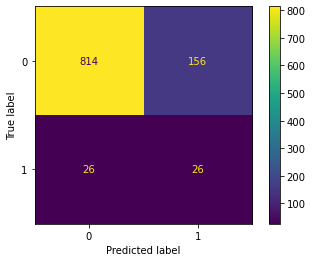

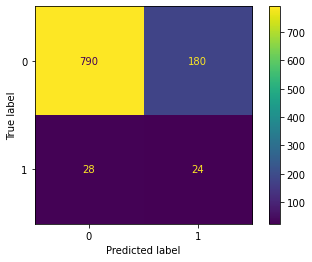

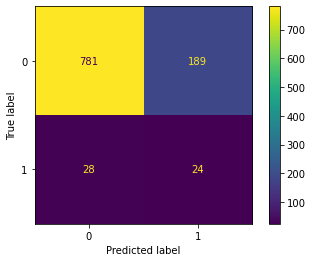

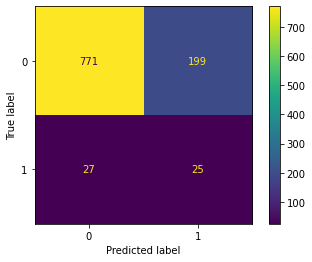

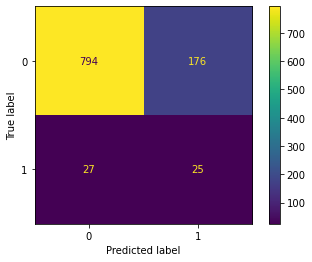

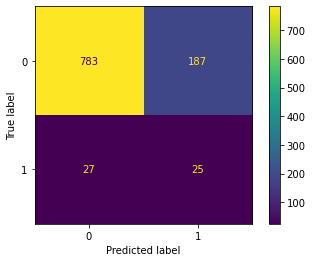

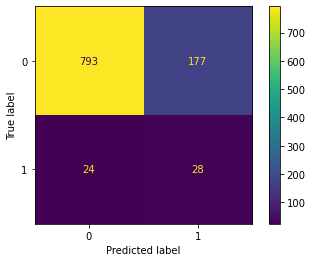

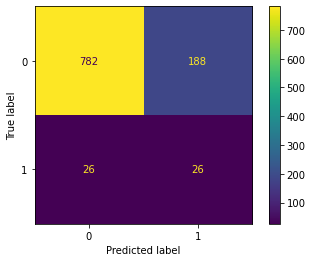

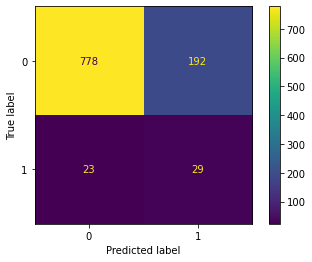

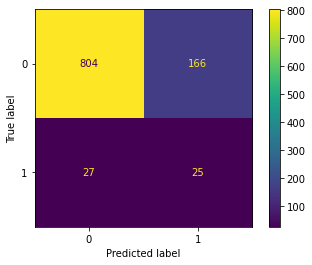

In [92]:
for k in k_values:
    model1 = DecisionTreeClassifier()
    over = BorderlineSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps1 = [('over', over),('under', under),('model1', model1)] # For DecisionTree model
    
    # For DecisionTree model
    pipeline1 = Pipeline(steps=steps1)
    pipeline1.fit(train_x, train_y)
    y_pred1=pipeline1.predict(test_x)
    pipeline1.score(test_x,test_y)
    plot_confusion_matrix(pipeline1,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred1, target_names=target_names))

# **Gaussian naive bayes (BorderlineSmote)**

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       970
           1       0.14      0.75      0.24        52

    accuracy                           0.75      1022
   macro avg       0.56      0.75      0.54      1022
weighted avg       0.94      0.75      0.82      1022

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       970
           1       0.14      0.77      0.24        52

    accuracy                           0.75      1022
   macro avg       0.56      0.76      0.55      1022
weighted avg       0.94      0.75      0.82      1022

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       970
           1       0.14      0.77      0.23        52

    accuracy                           0.74      1022
   macro avg       0.56      0.75      0.54      1022
weighted avg       0.94      0.74      0.81      1022

              preci

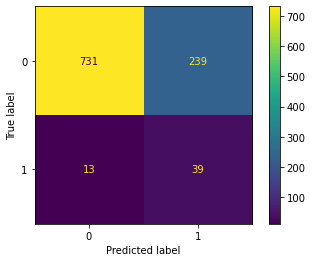

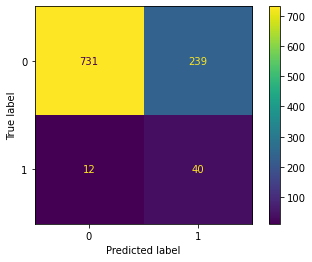

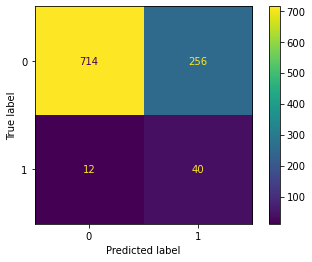

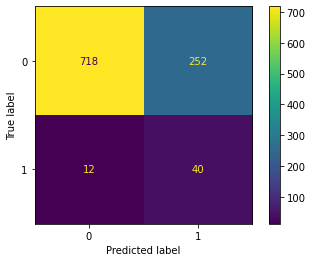

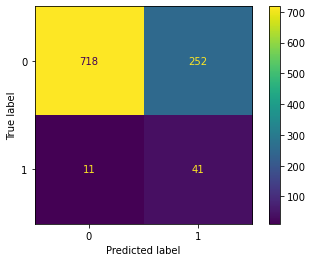

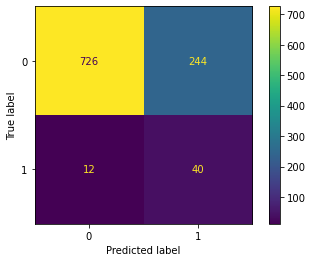

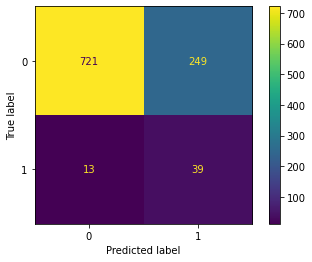

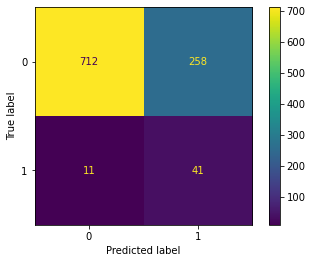

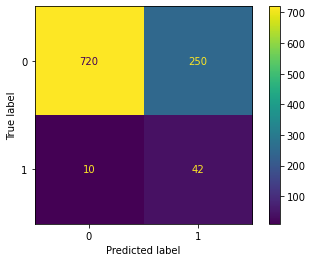

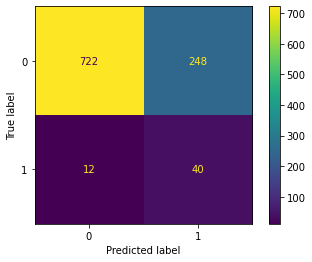

In [93]:
for k in k_values:
    model2 = GaussianNB()
    over = BorderlineSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps2 = [('over', over),('under', under),('model2', model2)] # For GaussianNB model
    
    # For GaussianNB model
    pipeline2 = Pipeline(steps=steps2)
    pipeline2.fit(train_x, train_y)
    y_pred2=pipeline2.predict(test_x)
    pipeline2.score(test_x,test_y)
    plot_confusion_matrix(pipeline2,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred2, target_names=target_names))

# **SVM kernal linear (BorderlineSmote)**

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       970
           1       0.16      0.73      0.26        52

    accuracy                           0.79      1022
   macro avg       0.57      0.76      0.57      1022
weighted avg       0.94      0.79      0.85      1022

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       970
           1       0.16      0.69      0.26        52

    accuracy                           0.80      1022
   macro avg       0.57      0.75      0.57      1022
weighted avg       0.94      0.80      0.85      1022

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       970
           1       0.16      0.69      0.26        52

    accuracy                           0.80      1022
   macro avg       0.57      0.75      0.57      1022
weighted avg       0.94      0.80      0.85      1022

              preci

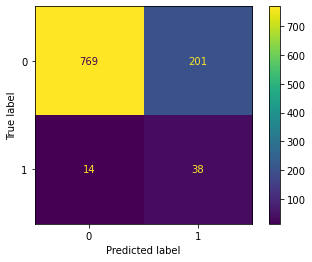

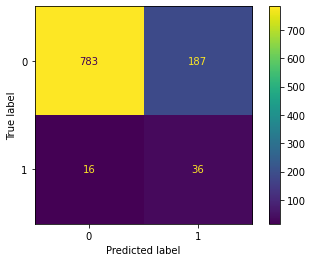

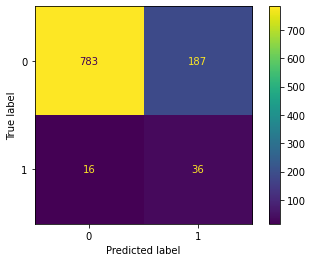

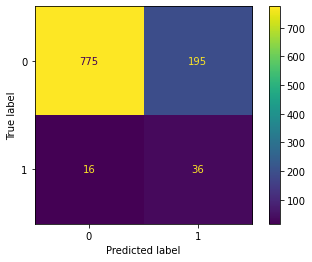

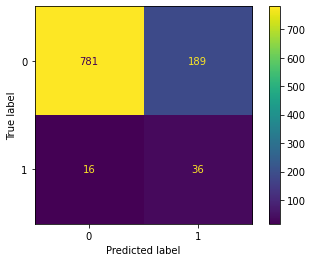

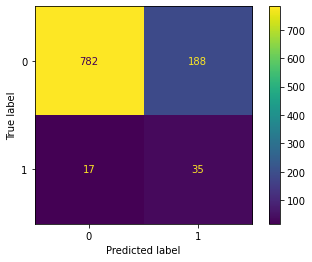

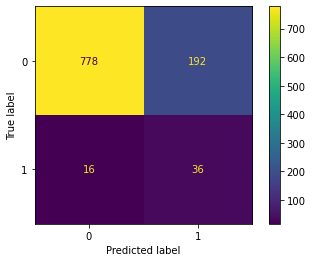

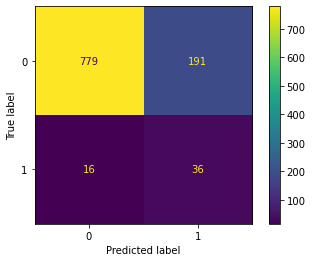

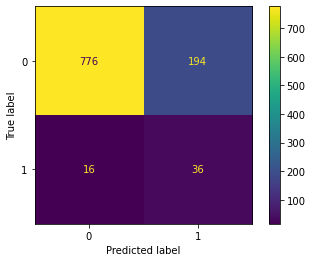

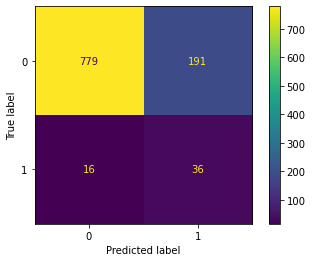

In [94]:
for k in k_values:
    model3 = SVC(kernel='linear')
    over = BorderlineSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps3 = [('over', over),('under', under),('model3', model3)] # For SVM kernel linear model
    
    # For SVM kernel linear model
    pipeline3 = Pipeline(steps=steps3)
    pipeline3.fit(train_x, train_y)
    y_pred3=pipeline3.predict(test_x)
    pipeline3.score(test_x,test_y)
    plot_confusion_matrix(pipeline3,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred3, target_names=target_names))

# **SVM kernal poly (BorderlineSmote)**

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       970
           1       0.18      0.63      0.28        52

    accuracy                           0.84      1022
   macro avg       0.58      0.74      0.60      1022
weighted avg       0.94      0.84      0.88      1022

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       970
           1       0.18      0.65      0.29        52

    accuracy                           0.84      1022
   macro avg       0.58      0.75      0.60      1022
weighted avg       0.94      0.84      0.88      1022

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       970
           1       0.19      0.65      0.29        52

    accuracy                           0.84      1022
   macro avg       0.58      0.75      0.60      1022
weighted avg       0.94      0.84      0.88      1022

              preci

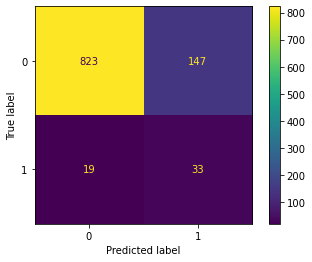

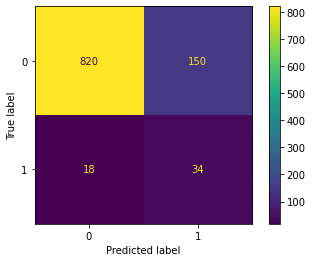

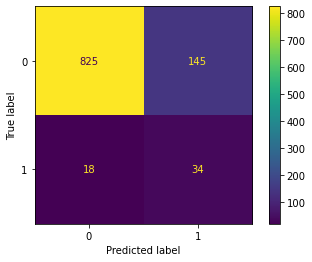

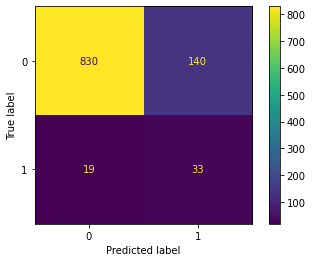

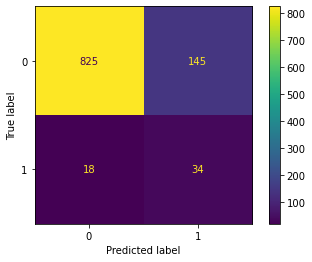

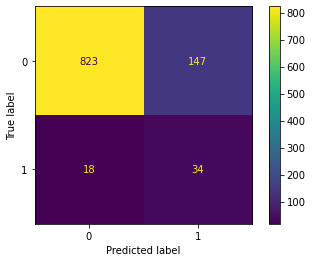

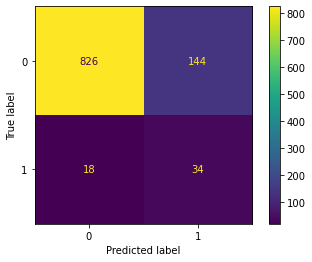

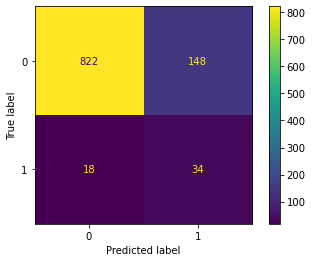

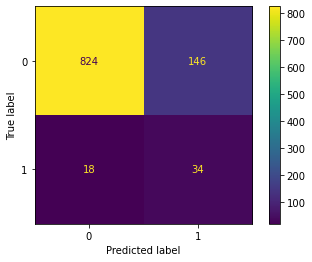

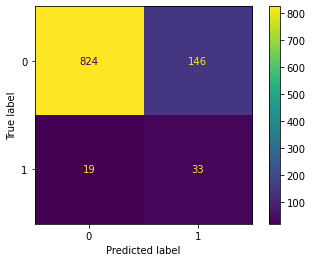

In [95]:
for k in k_values:
    model4 = SVC(kernel='poly',degree=3)
    over = BorderlineSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps4 = [('over', over),('under', under),('model4', model4)] # For SVM kernel Poly model
    
    # For SVM kernel Poly model
    pipeline4 = Pipeline(steps=steps4)
    pipeline4.fit(train_x, train_y)
    y_pred4=pipeline4.predict(test_x)
    pipeline4.score(test_x,test_y)
    plot_confusion_matrix(pipeline4,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred4, target_names=target_names))

# **SVM kernal rbf (BorderlineSmote)**

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       970
           1       0.17      0.65      0.27        52

    accuracy                           0.82      1022
   macro avg       0.57      0.74      0.58      1022
weighted avg       0.94      0.82      0.86      1022

              precision    recall  f1-score   support

           0       0.98      0.82      0.90       970
           1       0.18      0.71      0.28        52

    accuracy                           0.82      1022
   macro avg       0.58      0.77      0.59      1022
weighted avg       0.94      0.82      0.86      1022

              precision    recall  f1-score   support

           0       0.98      0.81      0.88       970
           1       0.17      0.73      0.27        52

    accuracy                           0.80      1022
   macro avg       0.57      0.77      0.58      1022
weighted avg       0.94      0.80      0.85      1022

              preci

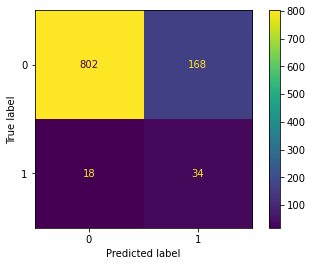

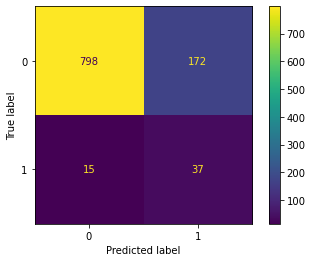

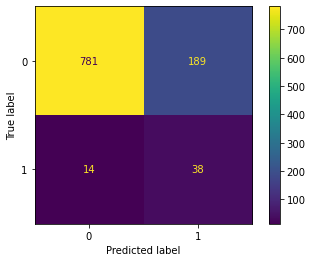

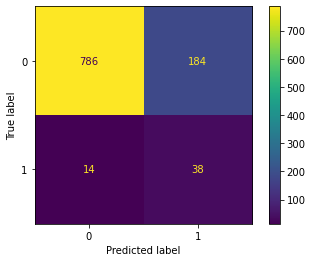

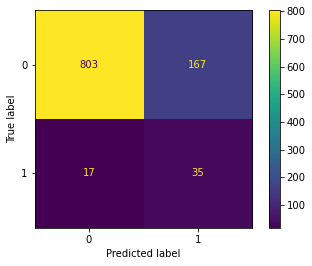

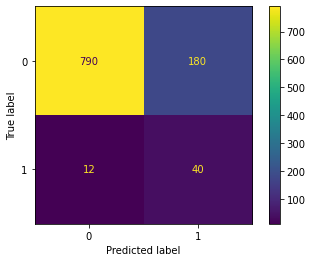

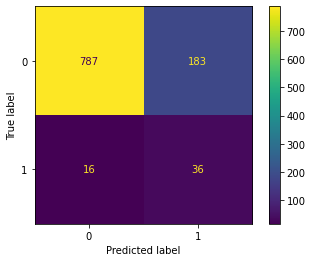

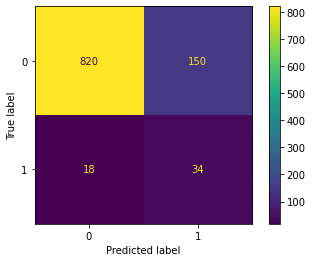

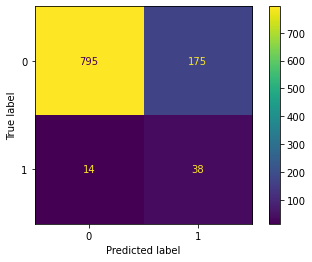

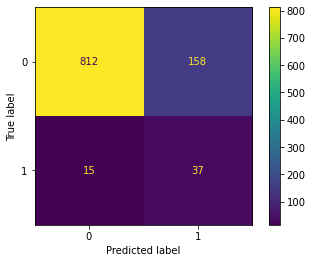

In [96]:
for k in k_values:
    model5 = SVC(kernel='rbf',gamma=0.10, C=8.0)
    over = BorderlineSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps5 = [('over', over),('under', under),('model5', model5)] # For SVM kernel rbf model
    
    # For SVM kernel rbf model
    pipeline5 = Pipeline(steps=steps5)
    pipeline5.fit(train_x, train_y)
    y_pred5=pipeline5.predict(test_x)
    pipeline5.score(test_x,test_y)
    plot_confusion_matrix(pipeline5,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred5, target_names=target_names))

# **K-nearest neighbors (BorderlineSmote)**

              precision    recall  f1-score   support

           0       0.99      0.80      0.88       970
           1       0.17      0.79      0.29        52

    accuracy                           0.80      1022
   macro avg       0.58      0.79      0.58      1022
weighted avg       0.94      0.80      0.85      1022

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       970
           1       0.18      0.79      0.29        52

    accuracy                           0.81      1022
   macro avg       0.58      0.80      0.59      1022
weighted avg       0.95      0.81      0.86      1022

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       970
           1       0.17      0.73      0.27        52

    accuracy                           0.80      1022
   macro avg       0.58      0.77      0.58      1022
weighted avg       0.94      0.80      0.86      1022

              preci

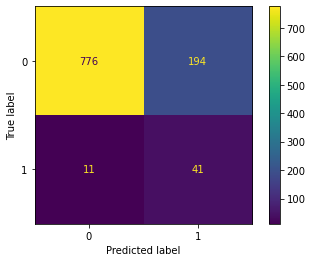

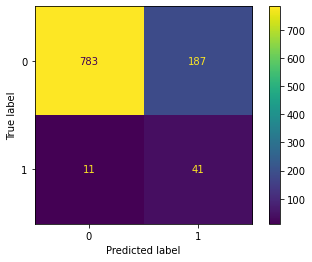

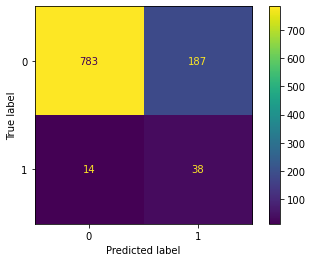

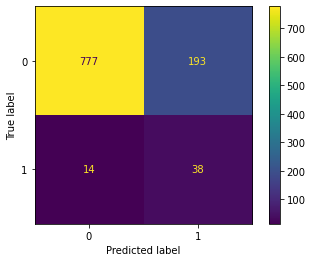

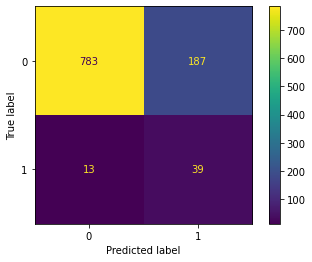

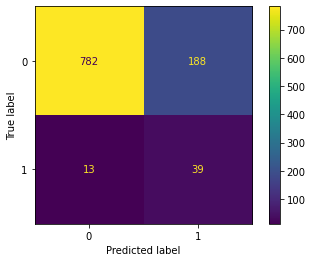

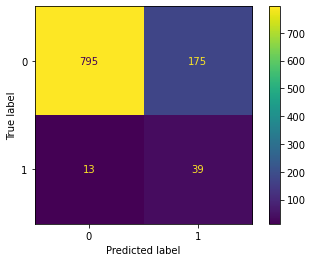

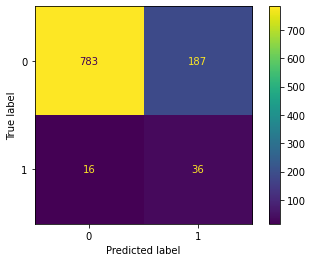

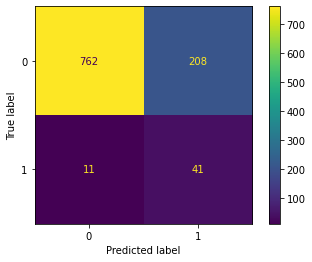

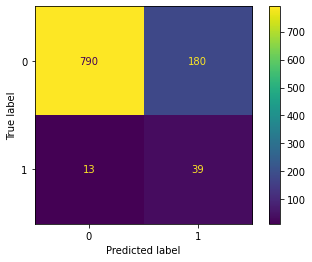

In [97]:
for k in k_values:
    model6 = KNeighborsClassifier(n_neighbors=7)
    over = BorderlineSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps6 = [('over', over),('under', under),('model6', model6)] # For K-nearest neighbors model
    
    # For K-nearest neighbors model
    pipeline6 = Pipeline(steps=steps6)
    pipeline6.fit(train_x, train_y)
    y_pred6=pipeline6.predict(test_x)
    pipeline6.score(test_x,test_y)
    plot_confusion_matrix(pipeline6,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred6, target_names=target_names))

# **Hybrid data balancing techniqe (SVMSmote oversampling and RandomUnderSampler)**

# **Decision Tree (SVMSmote)**

              precision    recall  f1-score   support

           0       0.97      0.80      0.87       970
           1       0.12      0.50      0.19        52

    accuracy                           0.78      1022
   macro avg       0.54      0.65      0.53      1022
weighted avg       0.92      0.78      0.84      1022

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       970
           1       0.13      0.54      0.20        52

    accuracy                           0.79      1022
   macro avg       0.55      0.67      0.54      1022
weighted avg       0.93      0.79      0.84      1022

              precision    recall  f1-score   support

           0       0.97      0.80      0.87       970
           1       0.12      0.50      0.19        52

    accuracy                           0.78      1022
   macro avg       0.54      0.65      0.53      1022
weighted avg       0.92      0.78      0.84      1022

              preci

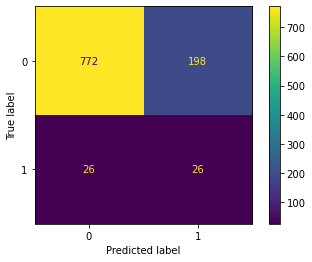

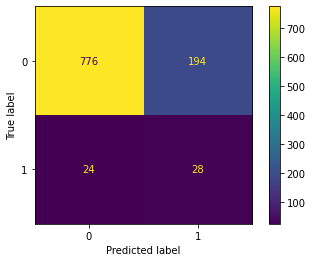

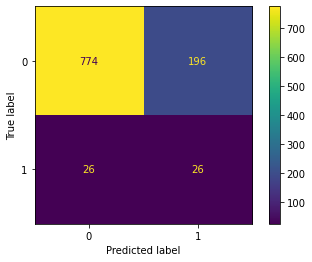

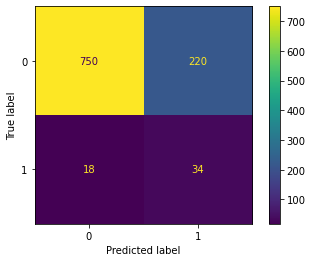

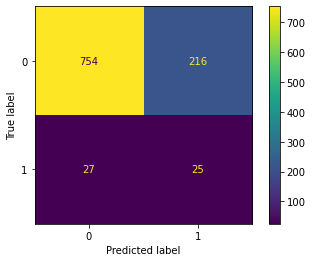

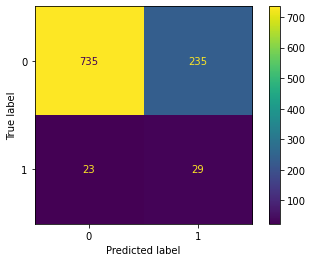

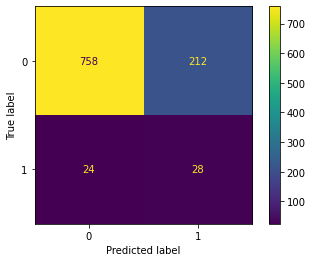

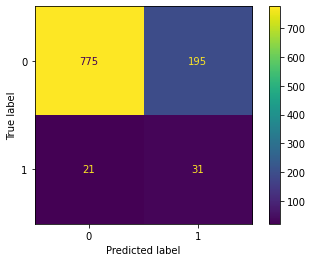

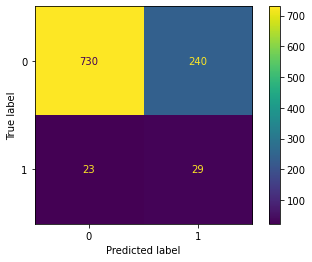

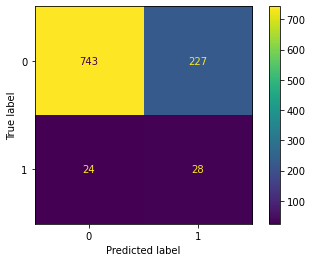

In [98]:
for k in k_values:
    model1 = DecisionTreeClassifier()
    over = SVMSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps1 = [('over', over),('under', under),('model1', model1)] # For DecisionTree model
    
    # For DecisionTree model
    pipeline1 = Pipeline(steps=steps1)
    pipeline1.fit(train_x, train_y)
    y_pred1=pipeline1.predict(test_x)
    pipeline1.score(test_x,test_y)
    plot_confusion_matrix(pipeline1,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred1, target_names=target_names))

# **Gaussian naive bayes (SVMSmote)**

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       970
           1       0.15      0.71      0.25        52

    accuracy                           0.78      1022
   macro avg       0.56      0.75      0.56      1022
weighted avg       0.94      0.78      0.84      1022

              precision    recall  f1-score   support

           0       0.98      0.77      0.87       970
           1       0.15      0.75      0.25        52

    accuracy                           0.77      1022
   macro avg       0.57      0.76      0.56      1022
weighted avg       0.94      0.77      0.83      1022

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       970
           1       0.15      0.73      0.24        52

    accuracy                           0.77      1022
   macro avg       0.56      0.75      0.55      1022
weighted avg       0.94      0.77      0.83      1022

              preci

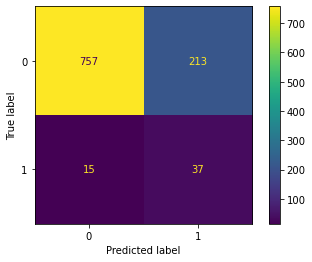

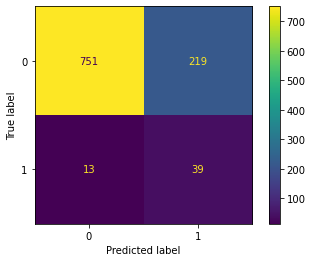

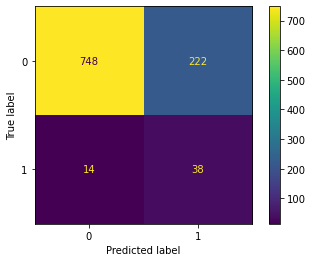

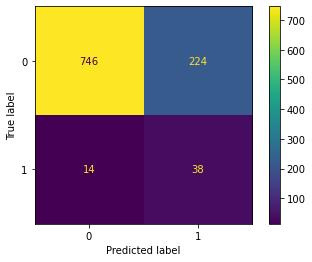

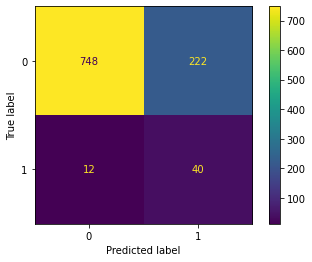

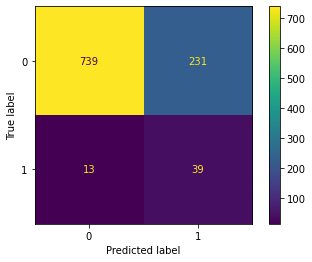

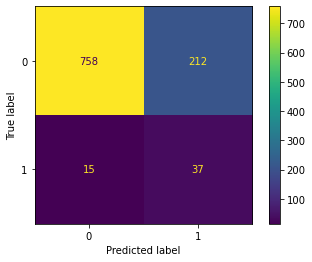

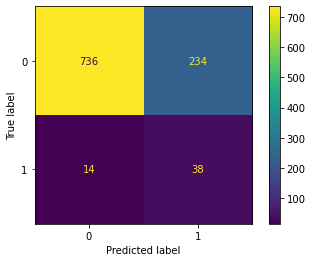

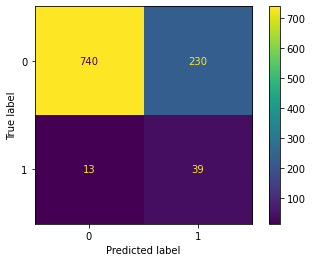

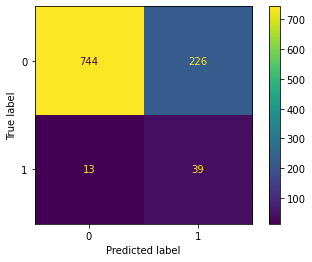

In [99]:
for k in k_values:
    model2 = GaussianNB()
    over = SVMSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps2 = [('over', over),('under', under),('model2', model2)] # For GaussianNB model
    
    # For GaussianNB model
    pipeline2 = Pipeline(steps=steps2)
    pipeline2.fit(train_x, train_y)
    y_pred2=pipeline2.predict(test_x)
    pipeline2.score(test_x,test_y)
    plot_confusion_matrix(pipeline2,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred2, target_names=target_names))

# **SVM kernal linear (SVMSmote)**

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       970
           1       0.16      0.73      0.26        52

    accuracy                           0.79      1022
   macro avg       0.57      0.76      0.57      1022
weighted avg       0.94      0.79      0.85      1022

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       970
           1       0.16      0.71      0.26        52

    accuracy                           0.79      1022
   macro avg       0.57      0.75      0.57      1022
weighted avg       0.94      0.79      0.85      1022

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       970
           1       0.16      0.69      0.25        52

    accuracy                           0.79      1022
   macro avg       0.57      0.75      0.57      1022
weighted avg       0.94      0.79      0.85      1022

              preci

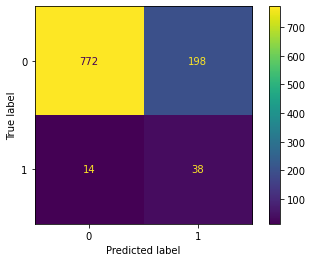

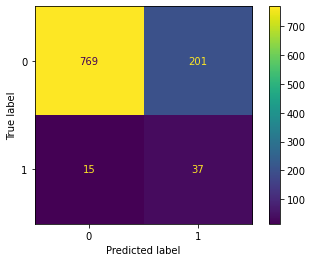

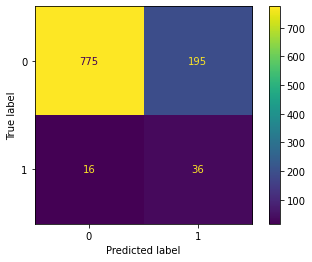

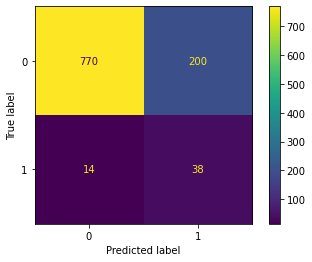

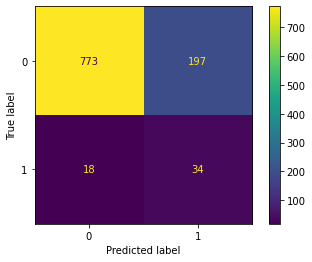

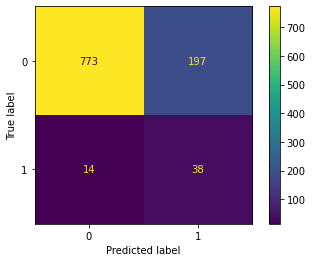

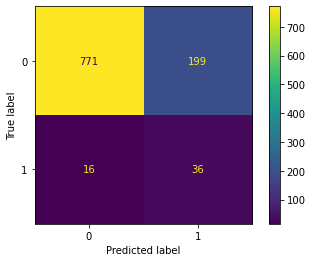

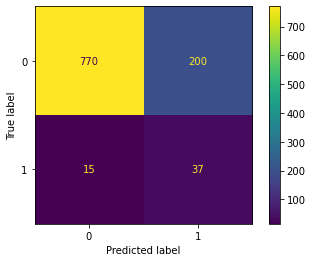

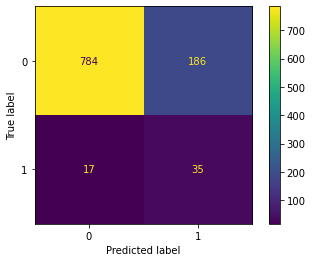

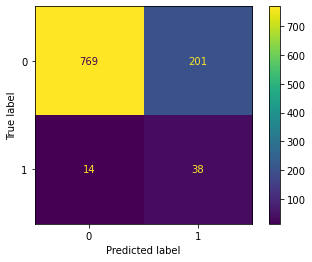

In [100]:
for k in k_values:
    model3 = SVC(kernel='linear')
    over = SVMSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps3 = [('over', over),('under', under),('model3', model3)] # For SVM kernel linear model
    
    # For SVM kernel linear model
    pipeline3 = Pipeline(steps=steps3)
    pipeline3.fit(train_x, train_y)
    y_pred3=pipeline3.predict(test_x)
    pipeline3.score(test_x,test_y)
    plot_confusion_matrix(pipeline3,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred3, target_names=target_names)) 

# **SVM kernal poly (SVMSmote)**

              precision    recall  f1-score   support

           0       0.98      0.86      0.91       970
           1       0.19      0.63      0.29        52

    accuracy                           0.84      1022
   macro avg       0.58      0.75      0.60      1022
weighted avg       0.94      0.84      0.88      1022

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       970
           1       0.18      0.63      0.28        52

    accuracy                           0.84      1022
   macro avg       0.58      0.74      0.60      1022
weighted avg       0.94      0.84      0.88      1022

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       970
           1       0.18      0.63      0.28        52

    accuracy                           0.84      1022
   macro avg       0.58      0.74      0.60      1022
weighted avg       0.94      0.84      0.88      1022

              preci

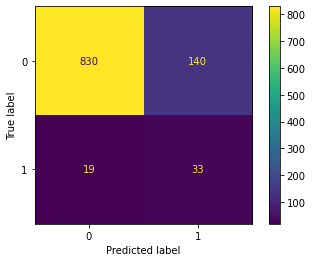

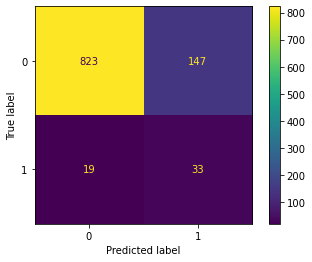

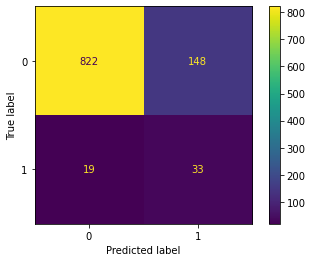

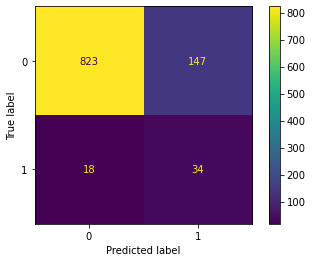

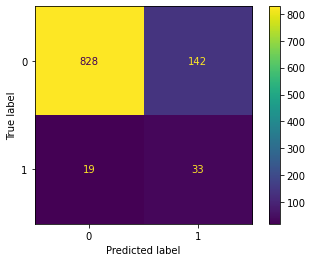

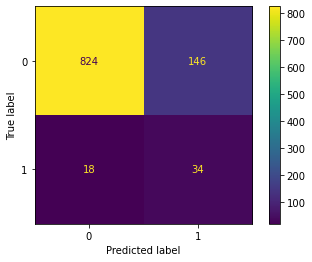

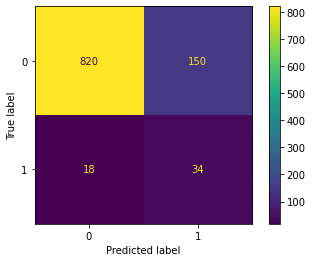

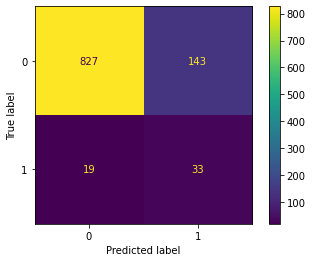

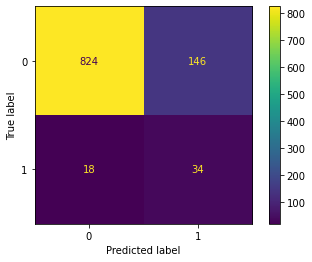

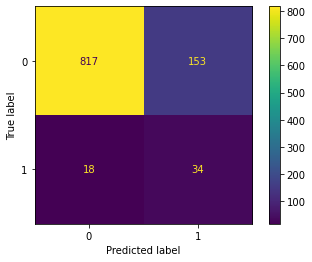

In [101]:
for k in k_values:
    model4 = SVC(kernel='poly',degree=3)
    over = SVMSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps4 = [('over', over),('under', under),('model4', model4)] # For SVM kernel Poly model
    
    # For SVM kernel Poly model
    pipeline4 = Pipeline(steps=steps4)
    pipeline4.fit(train_x, train_y)
    y_pred4=pipeline4.predict(test_x)
    pipeline4.score(test_x,test_y)
    plot_confusion_matrix(pipeline4,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred4, target_names=target_names))

# **SVM kernal rbf (SVMSmote)**

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       970
           1       0.16      0.73      0.26        52

    accuracy                           0.79      1022
   macro avg       0.57      0.76      0.57      1022
weighted avg       0.94      0.79      0.85      1022

              precision    recall  f1-score   support

           0       0.98      0.81      0.89       970
           1       0.16      0.69      0.26        52

    accuracy                           0.80      1022
   macro avg       0.57      0.75      0.57      1022
weighted avg       0.94      0.80      0.85      1022

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       970
           1       0.15      0.79      0.26        52

    accuracy                           0.77      1022
   macro avg       0.57      0.78      0.56      1022
weighted avg       0.94      0.77      0.83      1022

              preci

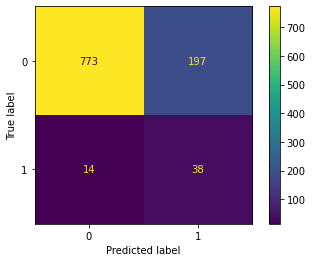

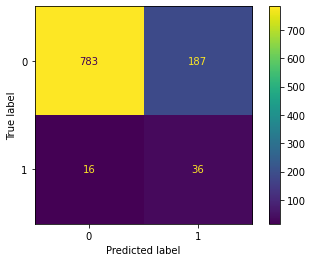

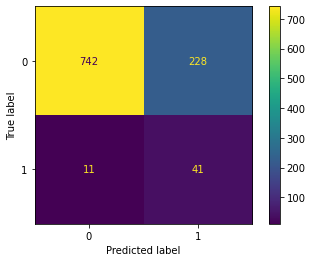

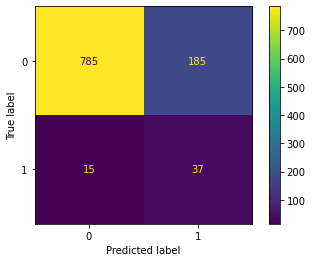

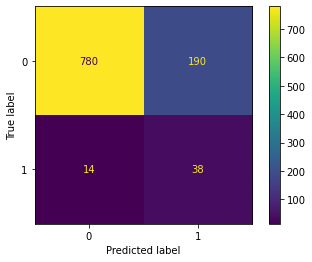

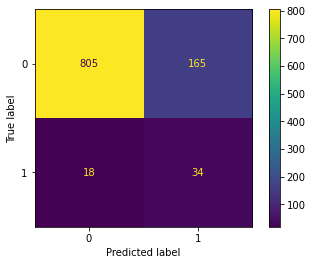

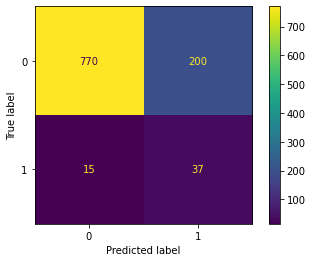

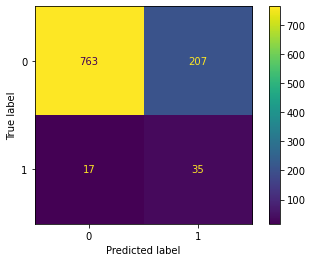

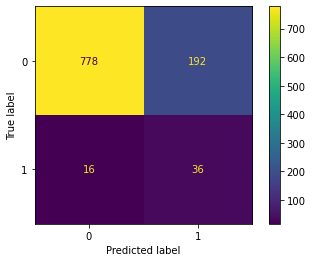

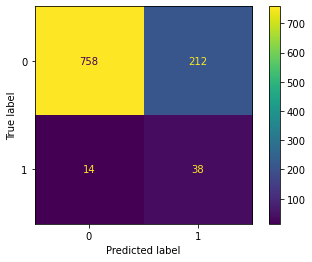

In [102]:
for k in k_values:
    model5 = SVC(kernel='rbf',gamma=0.10, C=8.0)
    over = SVMSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps5 = [('over', over),('under', under),('model5', model5)] # For SVM kernel rbf model
    
    # For SVM kernel rbf model
    pipeline5 = Pipeline(steps=steps5)
    pipeline5.fit(train_x, train_y)
    y_pred5=pipeline5.predict(test_x)
    pipeline5.score(test_x,test_y)
    plot_confusion_matrix(pipeline5,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred5, target_names=target_names))

# **K-nearest neighbors (SVMSmote)**

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       970
           1       0.15      0.73      0.25        52

    accuracy                           0.77      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.94      0.77      0.84      1022

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       970
           1       0.16      0.75      0.26        52

    accuracy                           0.79      1022
   macro avg       0.57      0.77      0.57      1022
weighted avg       0.94      0.79      0.84      1022

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       970
           1       0.16      0.77      0.27        52

    accuracy                           0.79      1022
   macro avg       0.57      0.78      0.57      1022
weighted avg       0.94      0.79      0.84      1022

              preci

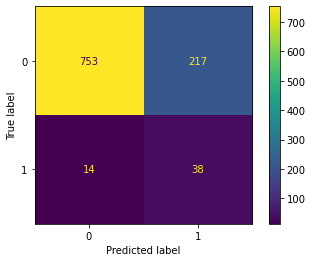

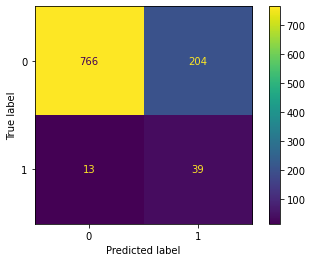

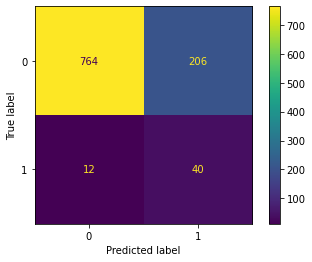

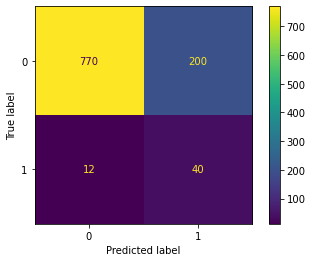

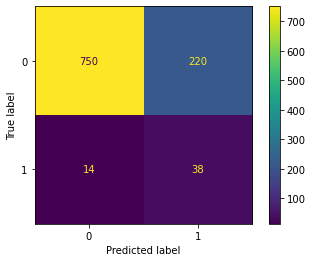

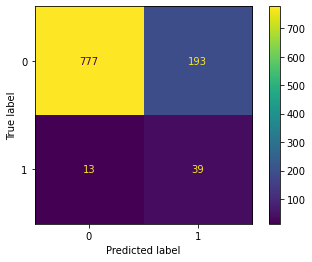

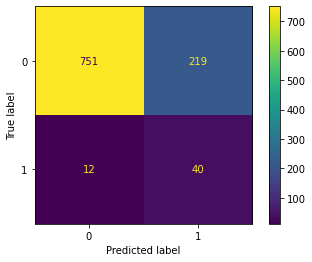

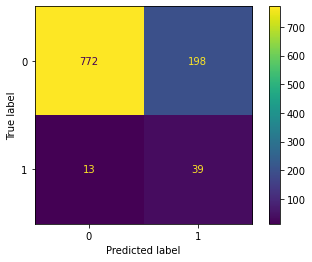

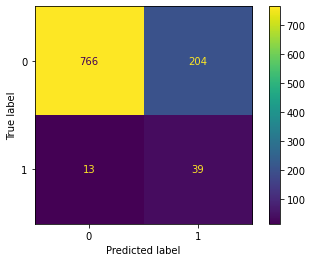

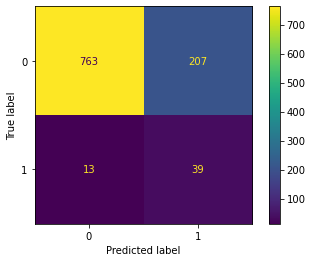

In [103]:
for k in k_values:
    model6 = KNeighborsClassifier(n_neighbors=7)
    over = SVMSMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.6,random_state=0)
    
    steps6 = [('over', over),('under', under),('model6', model6)] # For K-nearest neighbors model
    
    # For K-nearest neighbors model
    pipeline6 = Pipeline(steps=steps6)
    pipeline6.fit(train_x, train_y)
    y_pred6=pipeline6.predict(test_x)
    pipeline6.score(test_x,test_y)
    plot_confusion_matrix(pipeline6,test_x,test_y,display_labels=['0','1'])
    print(classification_report(test_y, y_pred6, target_names=target_names))

# **Hybrid data balancing techniqe ( SMOTETOMEK )**

# **Decision Tree (SmoteTomek)**

In [104]:
smTom = SMOTETomek(random_state = 120)
train_x, train_y = smTom.fit_resample(train_x, train_y)

model = DecisionTreeClassifier()

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.8424657534246576

<AxesSubplot:>

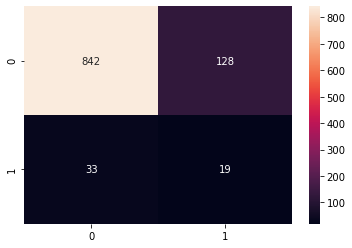

In [105]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [106]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       970
           1       0.13      0.37      0.19        52

    accuracy                           0.84      1022
   macro avg       0.55      0.62      0.55      1022
weighted avg       0.92      0.84      0.88      1022



# **Gaussian naive bayes (SmoteTomek)**

In [107]:
smTom = SMOTETomek(random_state = 120)
train_x, train_y = smTom.fit_resample(train_x, train_y)

model=GaussianNB()

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.6076320939334638

<AxesSubplot:>

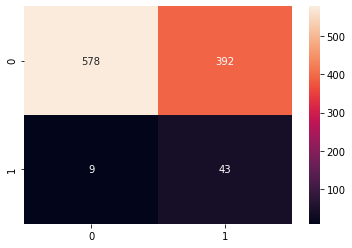

In [108]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [109]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.60      0.74       970
           1       0.10      0.83      0.18        52

    accuracy                           0.61      1022
   macro avg       0.54      0.71      0.46      1022
weighted avg       0.94      0.61      0.71      1022



# **SVM Kernal linear (SmoteTomek)**

In [110]:
smTom = SMOTETomek(random_state = 120)
train_x, train_y = smTom.fit_resample(train_x, train_y)

model = SVC(kernel='linear')

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.7172211350293543

<AxesSubplot:>

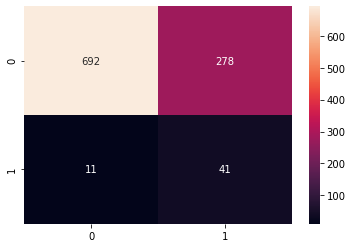

In [111]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [112]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.71      0.83       970
           1       0.13      0.79      0.22        52

    accuracy                           0.72      1022
   macro avg       0.56      0.75      0.52      1022
weighted avg       0.94      0.72      0.80      1022



# **SVM Kernal poly (SmoteTomek)**

In [113]:
smTom = SMOTETomek(random_state = 120)
train_x, train_y = smTom.fit_resample(train_x, train_y)

model = SVC(kernel='poly',degree=3)

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.7818003913894325

<AxesSubplot:>

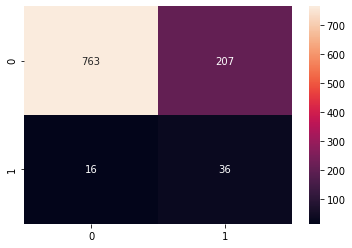

In [114]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [115]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       970
           1       0.15      0.69      0.24        52

    accuracy                           0.78      1022
   macro avg       0.56      0.74      0.56      1022
weighted avg       0.94      0.78      0.84      1022



# **SVM Kernal rbf (SmoteTomek)**

In [116]:
smTom = SMOTETomek(random_state = 120)
train_x, train_y = smTom.fit_resample(train_x, train_y)

model = SVC(kernel='rbf',gamma=0.10, C=8.0)

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.7906066536203522

<AxesSubplot:>

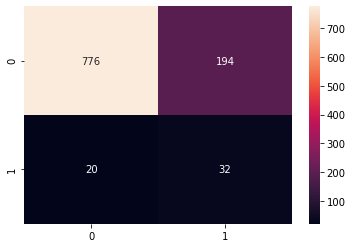

In [117]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [118]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       970
           1       0.14      0.62      0.23        52

    accuracy                           0.79      1022
   macro avg       0.56      0.71      0.55      1022
weighted avg       0.93      0.79      0.85      1022



# **K-nearest neighbors (SmoteTomek)**

In [119]:
smTom = SMOTETomek(random_state = 120)
train_x, train_y = smTom.fit_resample(train_x, train_y)

model = KNeighborsClassifier(n_neighbors=11)

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.8023483365949119

<AxesSubplot:>

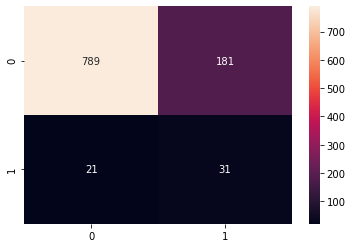

In [120]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [121]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.81      0.89       970
           1       0.15      0.60      0.23        52

    accuracy                           0.80      1022
   macro avg       0.56      0.70      0.56      1022
weighted avg       0.93      0.80      0.85      1022



# **Decision Tree (Smote ENN)**

In [122]:
smENN = SMOTEENN(random_state = 120)
train_x, train_y = smENN.fit_resample(train_x, train_y)

model = DecisionTreeClassifier()

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.8483365949119374

<AxesSubplot:>

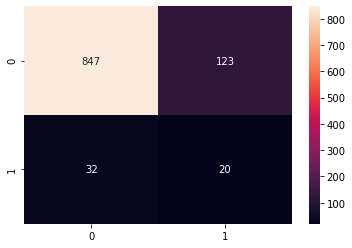

In [123]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [124]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92       970
           1       0.14      0.38      0.21        52

    accuracy                           0.85      1022
   macro avg       0.55      0.63      0.56      1022
weighted avg       0.92      0.85      0.88      1022



# **Gaussian naive bayes (Smote ENN)**

In [125]:
smENN = SMOTEENN(random_state = 120)
train_x, train_y = smENN.fit_resample(train_x, train_y)

model=GaussianNB()

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.6526418786692759

<AxesSubplot:>

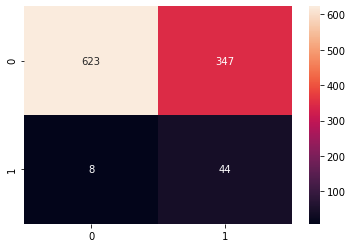

In [126]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [127]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.64      0.78       970
           1       0.11      0.85      0.20        52

    accuracy                           0.65      1022
   macro avg       0.55      0.74      0.49      1022
weighted avg       0.94      0.65      0.75      1022



# **SVM Kernal linear (Smote ENN)**

In [128]:
smENN = SMOTEENN(random_state = 120)
train_x, train_y = smENN.fit_resample(train_x, train_y)

model = SVC(kernel='linear')

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.7015655577299413

<AxesSubplot:>

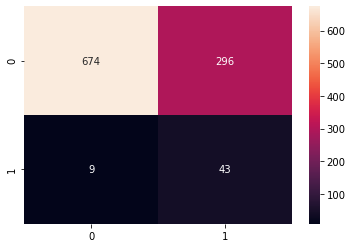

In [129]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [130]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.69      0.82       970
           1       0.13      0.83      0.22        52

    accuracy                           0.70      1022
   macro avg       0.56      0.76      0.52      1022
weighted avg       0.94      0.70      0.79      1022



# **SVM Kernal poly (Smote ENN)**

In [131]:
smENN = SMOTEENN(random_state = 120)
train_x, train_y = smENN.fit_resample(train_x, train_y)

model = SVC(kernel='poly',degree=3)

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.7397260273972602

<AxesSubplot:>

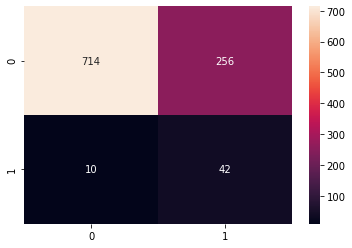

In [132]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [133]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.74      0.84       970
           1       0.14      0.81      0.24        52

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.74      0.81      1022



# **SVM Kernal rbf (Smote ENN)**

In [134]:
smENN = SMOTEENN(random_state = 120)
train_x, train_y = smENN.fit_resample(train_x, train_y)

model = SVC(kernel='rbf',gamma=0.10, C=8.0)

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.7837573385518591

<AxesSubplot:>

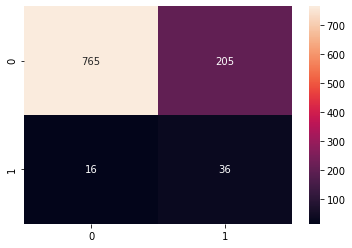

In [135]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [136]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87       970
           1       0.15      0.69      0.25        52

    accuracy                           0.78      1022
   macro avg       0.56      0.74      0.56      1022
weighted avg       0.94      0.78      0.84      1022



# **K-nearest neighbors (Smote ENN)**

In [137]:
smENN = SMOTEENN(random_state = 120)
train_x, train_y = smENN.fit_resample(train_x, train_y)

model = KNeighborsClassifier(n_neighbors=11)

model.fit(train_x,train_y)
y_pred=model.predict(test_x)
model.score(test_x,test_y)

0.7876712328767124

<AxesSubplot:>

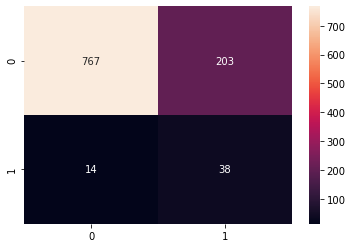

In [138]:
conf = confusion_matrix(test_y, y_pred)
sns.heatmap(conf, annot=True, fmt='d',xticklabels=['0','1'], yticklabels=['0','1'])

In [139]:
target_names = ['0','1']
print(classification_report(test_y, y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       970
           1       0.16      0.73      0.26        52

    accuracy                           0.79      1022
   macro avg       0.57      0.76      0.57      1022
weighted avg       0.94      0.79      0.84      1022

